# **Lab Work 1**

## **Step 1 - Creating Dummy Data**

In [2]:
import numpy as np
from sklearn.datasets import make_classification

# Create dummy data
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# By default, make_classification function produce features in floating point
# In this case, we want to make it as integer value

# Convert to absolute point
X = np.absolute(X)

# Round to 2 decimal place
X = np.round(X, 2) * 100

# Convert to interger
X = X.astype(int)
print(X)
print(y)

[[  2 202]
 [ 72 148]
 [ 47 274]
 [ 70 112]
 [ 74  96]
 [132  95]
 [198  16]
 [ 86 152]
 [ 93 169]
 [ 73  59]
 [ 57 222]
 [153  16]
 [150  64]
 [ 42 289]
 [ 55 107]
 [167  82]
 [ 79  97]
 [132  57]
 [196  64]
 [222 200]
 [182 140]
 [ 87 181]
 [ 33  71]
 [ 43  15]
 [ 32 180]
 [ 90 360]
 [174 130]
 [150 172]
 [ 40 259]
 [ 52  82]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


### (Optional) Creating DataFrame

In [3]:
import pandas as pd

# We need to reshape the label 'y' to 2d array
y_new = y.reshape(len(y), 1)

# Concatenate features and labels
data = np.concatenate((X, y_new), axis=1)

# Create a list of columns name
nama_kolom = ['Feature 1', 'Feature 2', 'Label']

# Create Pandas DataFrame
df = pd.DataFrame(data, columns=nama_kolom)

# Check DataFrame
df.head()

,Feature 1,Feature 2,Label
0,2,202,0
1,72,148,0
2,47,274,0
3,70,112,0
4,74,96,0


## **Step 2 - Convert Label to Categorical Value**

In [4]:
# Define categorical label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Duplicate DataFrame
df_label = df.copy()

# Map new label to encoded label
df_label['Label'] = df_label['Label'].map(labels)

# Check
df_label.head()

,Feature 1,Feature 2,Label
0,2,202,Kelas B
1,72,148,Kelas B
2,47,274,Kelas B
3,70,112,Kelas B
4,74,96,Kelas B


### (Optional) Visualize The Data

In [5]:
import matplotlib.pyplot as plt

# Define the color for each class
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Group by Label
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

KeyError: 'Fitur 1'

## **Step 3 - Create Multinomial Naive Bayes Model**

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Initiate the MultinomialNB object
mnb = MultinomialNB()

# We can use X and y from data dummy directly

# Split data into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fitting model
# Label y should be in 1D arraylike form
mnb.fit(X_train, y_train)

# Make a prediction from train data
y_train_pred = mnb.predict(X_train)

# Make a prediction from test data
y_test_pred = mnb.predict(X_test)

## **Step 4 - Model Evaluation**

In [7]:
from sklearn.metrics import accuracy_score

# training accuracy
acc_train = accuracy_score(y_train, y_train_pred)

# testing accuracy
acc_test = accuracy_score(y_test, y_test_pred)

# Model evaluation on accuracy
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.3333333333333333


## ***Gaussian Naive Bayes Model***

In [8]:
from sklearn.naive_bayes import GaussianNB

# Initiati GaussianNB object
gnb = GaussianNB()

# We will use the training and testing data from previous model

# Fit model
gnb.fit(X_train, y_train)

# Make a prediction using training data
y_train_pred_gnb = gnb.predict(X_train)

# Evaluate training data accuracy
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Make a prediction using testing data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluate testing data accuracy
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print model evaluation
print(f'Train Accuracy (Gaussian): {acc_train_gnb}')
print(f'Test Accuracy (Gaussian): {acc_test_gnb}')

Train Accuracy (Gaussian): 0.7619047619047619
Test Accuracy (Gaussian): 0.4444444444444444


# **Lab Work 2**

## **Step 1 - Load Data**

In [9]:
import numpy as np
import pandas as pd

# Load data with specific encoding due data doesn't use utf-8 encoding
df = pd.read_csv('spam.csv', encoding='latin-1')

# Check
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **Step 2 - Preprocessing**

### Step 2.1 - Drop Unecessary Columns

In [10]:
# Drop last 3 columns
df = df.drop(df.iloc[:,2:], axis=1)

# Check
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.2 - Rename Columns Name


In [11]:
# Rename "v1" and "v2"
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Do renaming columns
df = df.rename(columns=new_cols)

# Check
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.3 - Data Inspection

In [12]:
# Check data per class
print(df['Labels'].value_counts())
print('\n')

# Check general information
print(df.info())
print('\n')

# Check Descriptive Statistic Information
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


### Step 2.4 - Label Encoding

In [13]:
# Prepare the labels
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode
df['Labels'] = df['Labels'].map(new_labels)

# Check
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Step 2.5 - Split Features and Labels

In [14]:
X = df['SMS'].values
y = df['Labels'].values

## **Step 3 - Features Extraction**



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initaite CountVectorizer
bow = CountVectorizer()

# Fitting and transform X_train using CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Why just transform? The reason is the same as in the third experiment.
# We don't want the model to know the parameters used by CountVectorizer for fitting the X_train data.
# Thus, the testing data can remain unfamiliar to the model.
X_test = bow.transform(X_test)

print(len(bow.get_feature_names()))
print(f'Dimensi data: {X_train.shape}')

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

## ***Training and Evaluation***

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initiate MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Make a prediction using training data
y_pred_train = mnb.predict(X_train)

# Evaluate training data
acc_train = accuracy_score(y_train, y_pred_train)

# Make a prediction using testing data
y_pred_test = mnb.predict(X_test)

# Evaluate testing data
acc_test = accuracy_score(y_test, y_pred_test)

# Print model evaluation
print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')

Training Accuracy: 0.9946152120260264
Testing Accuracy: 0.9775784753363229


# **Lab Work 3 (Linear SVM)**

## **Step 0 - Import Library**

In [17]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## **Step 1 - Create Dummy Data**

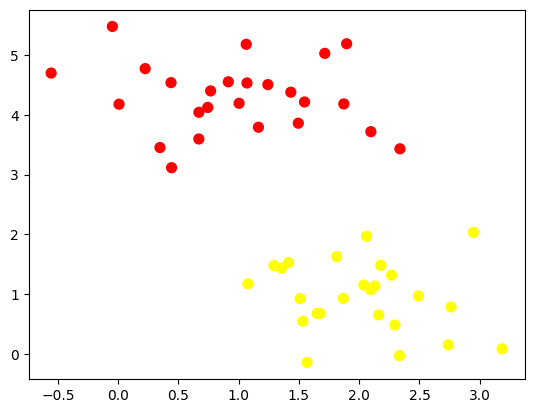

In [18]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## **Step 2 - Create Decision Boundaries**

(-1.0, 3.5)

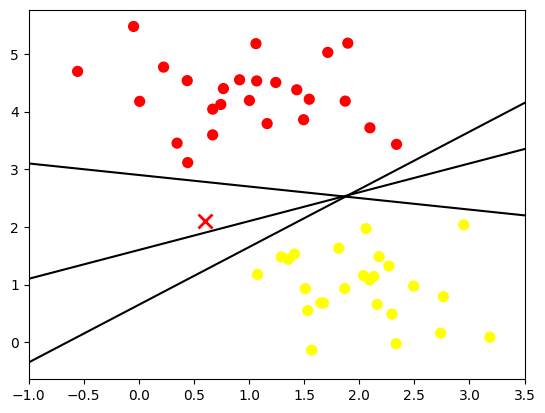

In [19]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

## **Step 3 - Create Margins**


(-1.0, 3.5)

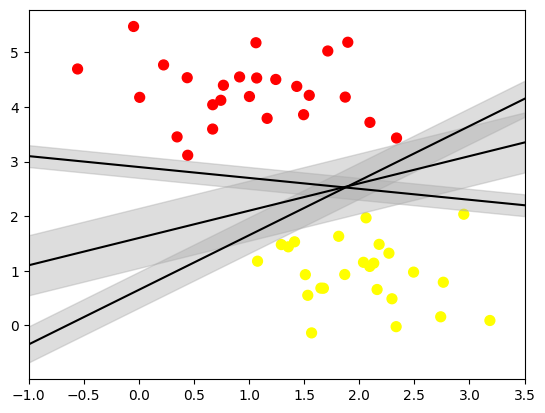

In [20]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## **Step 4 - Model Fitting**

In [21]:
from sklearn.svm import SVC # "Support vector classifier"

# Initaite SVC object
model = SVC(kernel='linear', C=1E10)

# Fitting
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Step 4.1 - Visualize Fitting Model

In [22]:
# create a function to plot decision boundary

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model)

### *Several data points that touch (enter) the area around the line are referred to as support vectors.*

RecursionError: maximum recursion depth exceeded in comparison

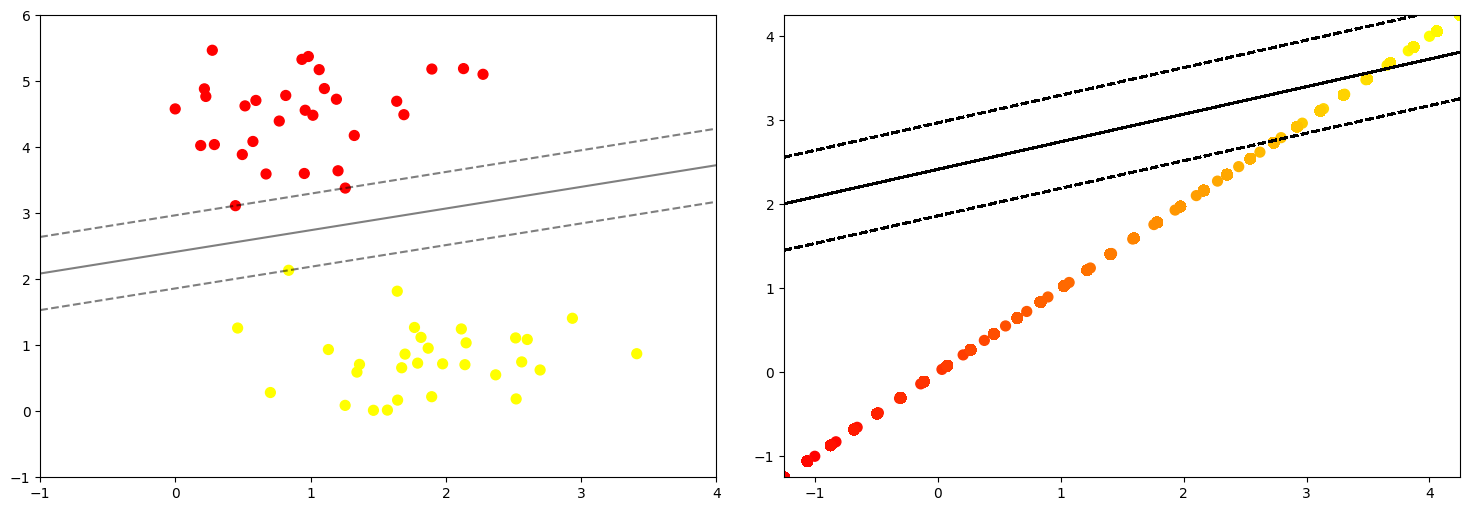

In [23]:
model.support_vectors_

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

# **Lab Work 3 (Non-Linear SVM)**

## **Step 1 - Create Dummy Data**

RecursionError: maximum recursion depth exceeded in comparison

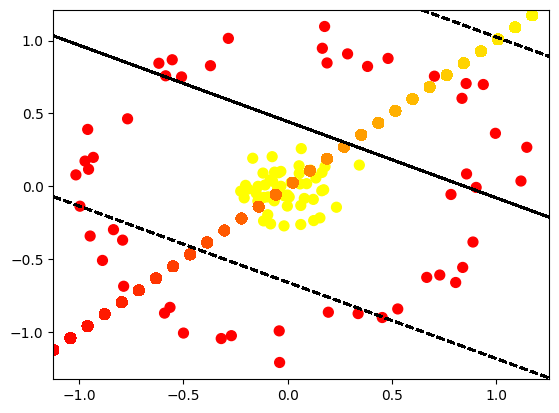

In [24]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Based on the example data above, no linear separating line can be found that can serve as a data separator. Therefore, another perspective or projection of the data is needed to clearly separate the data. In this activity, the projection used is based on a radial basis. Since the radial projection doesn't suffice with a 2D model, the visualization plot is transformed into a 3D model.

In [25]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

NameError: name 'interact' is not defined

## **Step 2 - Fitting Model**

In [26]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

### Step 2.1 - Visualize Decision Boundary

RecursionError: maximum recursion depth exceeded in comparison

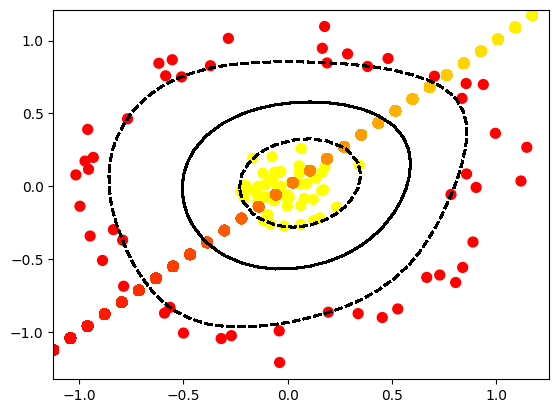

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

### Case on Overlapping Data

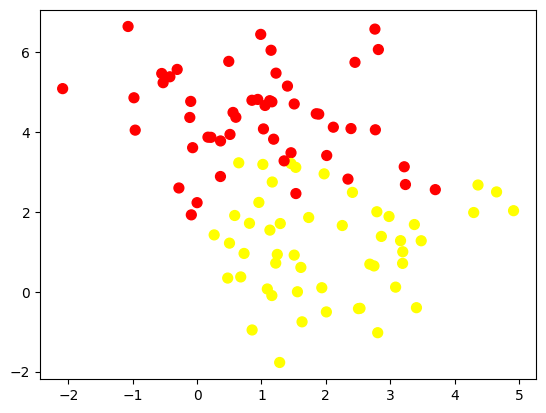

In [28]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

#### To address this, margin smoothing techniques in SVM can be applied. This technique involves incorporating some data points into the margin to achieve a better fit. The widening of the margin resulting from smoothing techniques is controlled by a tuning parameter (known as C). The example below demonstrates how changes in C can impact the final fitting result.

RecursionError: maximum recursion depth exceeded in comparison

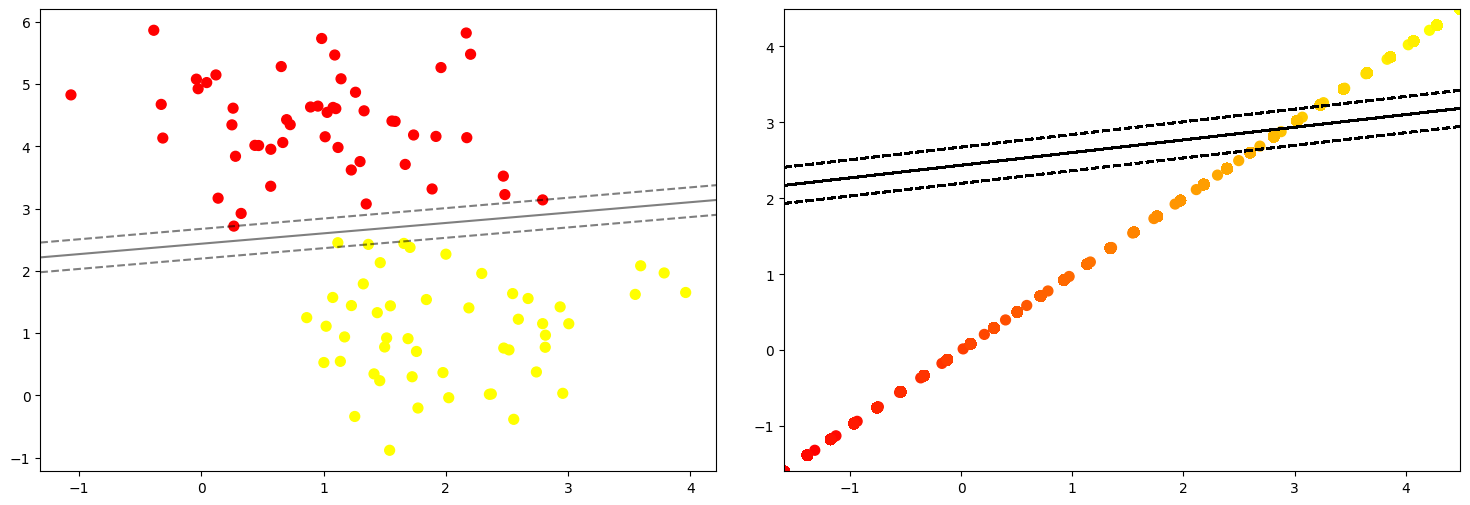

In [29]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **Lab Work 4**

## Step 1 - Download The Dataset

In [30]:
from sklearn.datasets import fetch_lfw_people

# Store data in 'faces'
faces = fetch_lfw_people(min_faces_per_person=60)

# Check the dataset
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## Step 2 - Visualize The Data

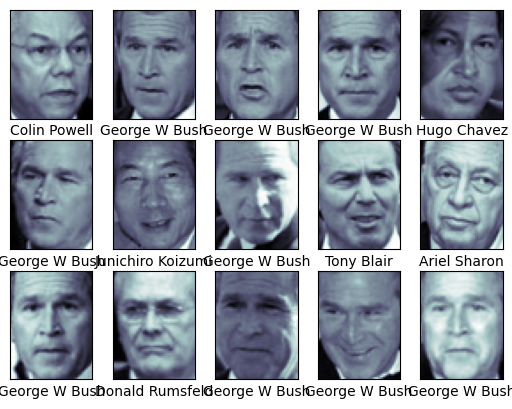

In [31]:
# We will plot some of the data

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

## Step 3 - Dimensional Reduction and Model Initiation

In [32]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# Notes that our image size is 62*47=2914
# PCA reduce its dimension to 150
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

# Intiate the SVM model
svc = SVC(kernel='rbf', class_weight='balanced')

# Create a pipeline -> Dimensional reduction followed by model fitting
model = make_pipeline(pca, svc)

## Step 4 - Split Data

In [33]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

## Step 5 - Perform Grid Search

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: user 1min 41s, sys: 27.2 s, total: 2min 9s
Wall time: 1min 24s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


## Step 6 - Evaluate The Test Set

In [35]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## Step 7 - Visualize The Prediction

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

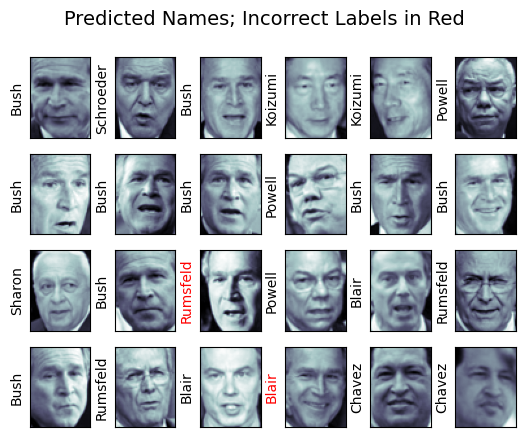

In [36]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

## Step 8 - Evaluate The Model

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



## Check the confusion matrix,

Text(113.92222222222219, 0.5, 'predicted label')

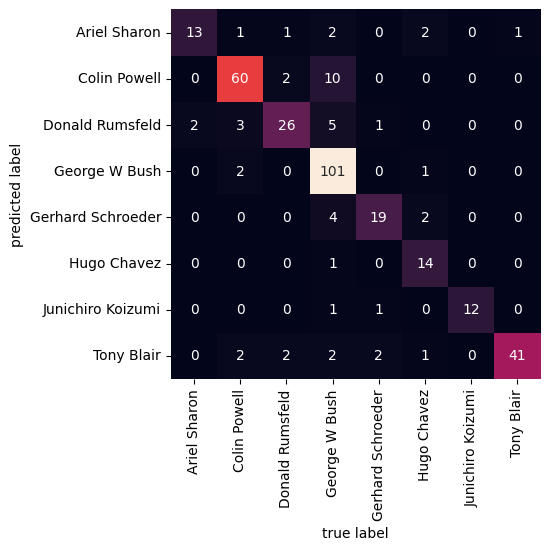

In [38]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **Lab Assignment**

## install jcopml

In [40]:
!pip install jcopml

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for jcopml: filename=jcopml-1.2.7-py2.py3-none-any.whl size=45918 sha256=6e36842478fe488befb5f444093e46a40e4d271fc1bd6af2c5211c3cf30d5ddf
  Stored in directory: /root/.cache/pip/wheels/1b/f0/69/8cd4944dd9637953ab744056b5faa32617cd4de449b213e886
Successfully built jcopml


## Create a classification model using SVM for the voice.csv data.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [42]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [43]:
data.columns = data.columns.str.strip()
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [44]:
X = data.drop(columns='label')
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2534, 20) (2534,) (634, 20) (634,)


In [45]:
gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [47]:
param_grid = {'algo__C': [1, 5, 10, 50],
              'algo__gamma': [0.0001, 0.0005, 0.001, 0.005]}


pipeline = Pipeline([
    ('algo', SVC())
])


model= GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'algo__C': 50, 'algo__gamma': 0.005}
0.9834254143646409 0.9763243500939454 0.9810725552050473


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



<Axes: >

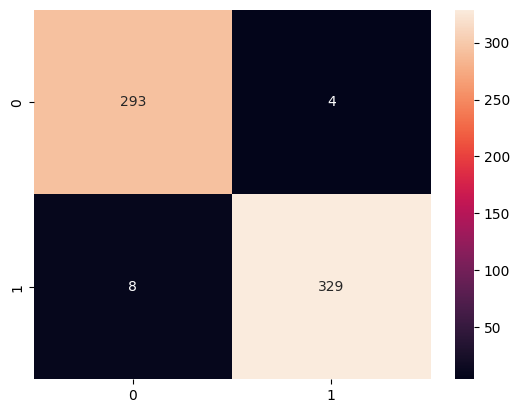

In [48]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [49]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

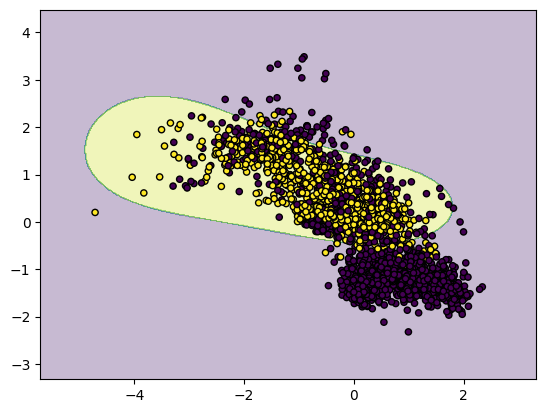

In [50]:
X_vis = X_train[:, :2]
y_vis = y_train

vis_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(C=1, gamma=0.1, kernel='rbf'))
])

vis_pipeline.fit(X_vis, y_vis)

X0, X1 = X_vis[:, 0], X_vis[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(vis_pipeline, xx, yy, cmap='viridis', alpha=0.3)
plt.scatter(X0, X1, c=y_vis, cmap='viridis', s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Create a Multinomial Naive Bayes classification model with the following conditions:

*   Use the spam.csv data.
*   Utilize CountVectorizer with stop words enabled.
*   Evaluate the results.

In [51]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# simple preprocessing function
def text_preprocess(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in word_tokenize(text) if word.lower() not in stop_words]

    # stemming
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]

    return text

data['message'] = data['message'].apply(text_preprocess)

data['message'] = data['message'].apply(lambda x: ' '.join(x))

data.head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [54]:
X = data['message']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4457,) (4457,) (1115,) (1115,)


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    'algo__alpha': [0.1, 0.5, 1],
    'algo__fit_prior': [True, False]
}

pipeline = Pipeline([
    ('prep', CountVectorizer()),
    ('algo', MultinomialNB())
])

model1 = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
model1.fit(X_train, y_train)

print(model1.best_params_)
print(model1.score(X_train, y_train), model1.best_score_, model1.score(X_test, y_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'algo__alpha': 0.1, 'algo__fit_prior': True}
0.9964101413506843 0.9851922847436531 0.9838565022421525


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

param_grid = {
    'algo__alpha': [0.1, 0.5, 1],
    'algo__fit_prior': [True, False]
}

pipeline = Pipeline([
    ('prep', TfidfVectorizer(stop_words='english')),
    ('algo', MultinomialNB())
])

model2 = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
model2.fit(X_train, y_train)

print(model2.best_params_)
print(model2.score(X_train, y_train), model2.best_score_, model2.score(X_test, y_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'algo__alpha': 0.1, 'algo__fit_prior': True}
0.9982050706753421 0.9827236021044904 0.9811659192825112


CountVectorizer + MultinomialNB
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

TfidfVectorizer + MultinomialNB
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



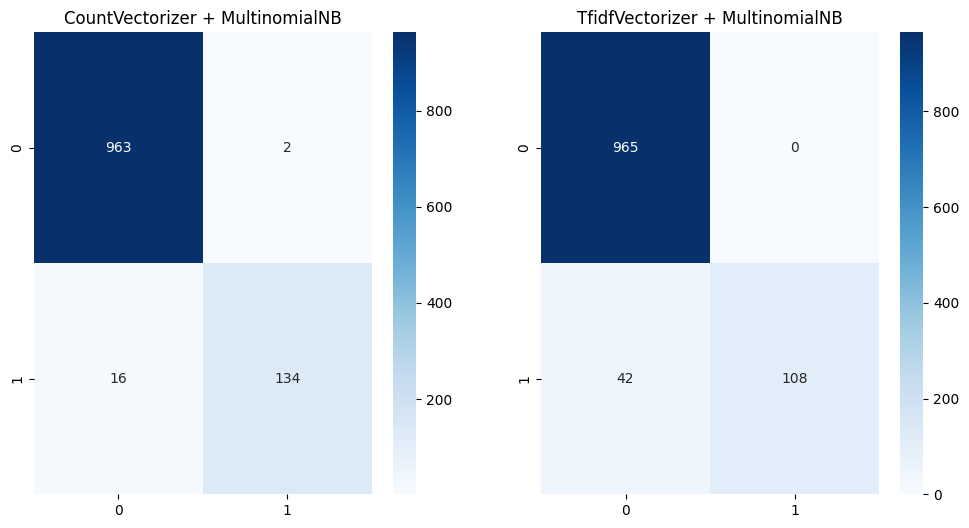

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the vectorizers
count_vect = CountVectorizer()
tfidf_vect = TfidfVectorizer()

# Step 2: Fit the vectorizers on the training data
X_train_count = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

# Step 3: Define and train the models
model = MultinomialNB()  # For CountVectorizer + MultinomialNB
model2 = MultinomialNB()  # For TfidfVectorizer + MultinomialNB

model.fit(X_train_count, y_train)
model2.fit(X_train_tfidf, y_train)

# Step 4: Transform the test data using the fitted vectorizers
X_test_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_vect.transform(X_test)

# Step 5: Predict using both models
y_pred = model.predict(X_test_count)  # For CountVectorizer + MultinomialNB
y_pred2 = model2.predict(X_test_tfidf)  # For TfidfVectorizer + MultinomialNB

# Step 6: Print classification reports
print("CountVectorizer + MultinomialNB")
print(classification_report(y_test, y_pred))

print("TfidfVectorizer + MultinomialNB")
print(classification_report(y_test, y_pred2))

# Step 7: Generate confusion matrices
cm = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred2)

# Step 8: Plot confusion matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='Blues')
sns.heatmap(cm2, annot=True, fmt='d', ax=ax[1], cmap='Blues')

# Set titles
ax[0].set_title('CountVectorizer + MultinomialNB')
ax[1].set_title('TfidfVectorizer + MultinomialNB')

# Show the plots
plt.show()


From the confusion matrices displayed in the image, the comparison between CountVectorizer + MultinomialNB and TfidfVectorizer + MultinomialNB models for the spam detection dataset is as follows:

**CountVectorizer + MultinomialNB:**


*   True Negatives (TN): 963
*   False Positives (FP): 2
*   False Negatives (FN): 16
*   True Positives (TP): 134


**TfidfVectorizer + MultinomialNB:**


*   True Negatives (TN): 965
*   False Positives (FP): 0
*   False Negatives (FN): 42
*   True Positives (TP): 108


**Key Metrics:**

*   Accuracy: Both models have very similar performance since the total number of correctly classified instances is high in both cases.

*   Precision: TfidfVectorizer + MultinomialNB appears to have a slightly better precision due to the reduction in False Positives (FP).
*   Recall: TfidfVectorizer + MultinomialNB has a better recall, identifying 108 positive instances correctly compared to 134 in the CountVectorizer model.


Conclusion:

While both models perform well, TfidfVectorizer + MultinomialNB has a slight edge in terms of recall and precision. It reduces false negatives and identifies more spam emails correctly, making it a better feature extraction method for the spam dataset in this case.